In [11]:
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
from train_valid_test_loader import load_train_valid_test_datasets
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()

In [12]:
alpha = 0.0
K_values = [2, 10, 50]
# K_values = [2]

models_by_K = {}

n_epochs = 600
batch_size=10000

for K in K_values:
    print(f"==================K={K}===========")
    model = CollabFilterOneVectorPerItem(
        n_epochs=n_epochs, batch_size=batch_size, step_size=0.1,
        n_factors=K, alpha=alpha)
    model.init_parameter_dict(n_users, n_items, train_tuple)
    model.fit(train_tuple, valid_tuple)
    
    # print(f"model.trace_loss: {model.trace_loss}")
    # print(f"model.trace_epoch: {model.trace_epoch}")
    # print(f"model.trace_auc_train: {model.trace_auc_train}")
    # print(f"model.trace_auc_valid: {model.trace_auc_valid}")
    
    models_by_K[K] = model

==================K=2===========
epoch       0.000 | loss_total     1.56690 | train_AUC    0.50269 | valid_AUC     0.49616 | grad_wrt_mu     1.07660 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch       0.143 | loss_total     1.44870 | train_AUC    0.68612 | valid_AUC     0.67306 | grad_wrt_mu     0.83204 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch       0.286 | loss_total     1.36992 | train_AUC    0.70525 | valid_AUC     0.69304 | grad_wrt_mu     0.67959 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch       0.429 | loss_total     1.34162 | train_AUC    0.71235 | valid_AUC     0.69848 | grad_wrt_mu     0.51794 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch       0.571 | loss_total 

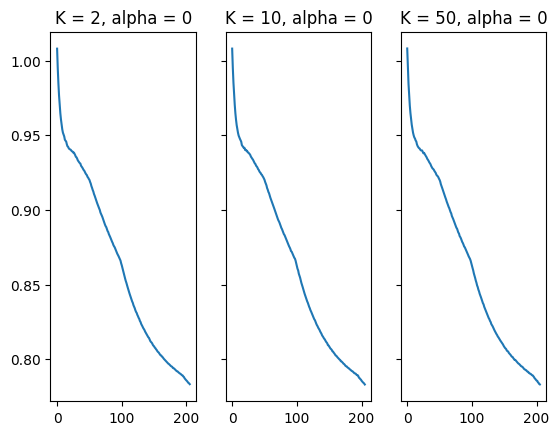

In [13]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True)

for i, K in enumerate(K_values):
    model = models_by_K[K]
    # user_id_N, item_id_N, y_N = test_tuple
    # yhat_N = model.predict(user_id_N, item_id_N)
    mae_by_epoch = model.trace_mae_valid
    a = ax[i]
    a.set_title(f"K = {K}, alpha = 0")
    a.plot(mae_by_epoch)

In [14]:
alpha_model = CollabFilterOneVectorPerItem(
        n_epochs=n_epochs, batch_size=batch_size, step_size=0.1,
        n_factors=50, alpha=0.01)

alpha_model.init_parameter_dict(n_users, n_items, train_tuple)
alpha_model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     1.54708 | train_AUC    0.50235 | valid_AUC     0.50524 | grad_wrt_mu     1.04441 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch       0.143 | loss_total     1.45820 | train_AUC    0.59393 | valid_AUC     0.58816 | grad_wrt_mu     0.89891 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch       0.286 | loss_total     1.42005 | train_AUC    0.64628 | valid_AUC     0.63711 | grad_wrt_mu     0.64168 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch       0.429 | loss_total     1.36532 | train_AUC    0.67415 | valid_AUC     0.66398 | grad_wrt_mu     0.56120 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch       0.571 | loss_total     1.34229 | train_AUC    0.6923

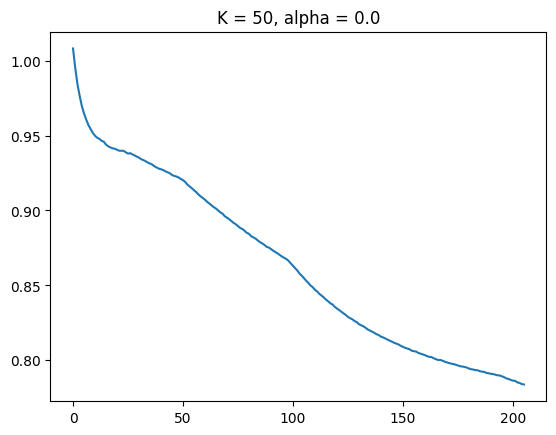

In [15]:
mae_by_epoch = alpha_model.trace_mae_valid
ax = plt.axes()
ax.set_title(f"K = {K}, alpha = {alpha}")
ax.plot(mae_by_epoch)